In [3]:
import os
import sys
sys.path.insert(0,'../')
from libs.ssl_dataloader import *
from libs.ssl_model import *
from libs.ssl_utils import *
from libs import eeg_utils
from sklearn.model_selection import train_test_split
# Use these commands in the same cell to autoreload local library source code
# https://stackoverflow.com/questions/45807760/change-source-code-and-update-jupyter-notebook-but-retain-variables
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/10 [00:00<?, ?it/s]/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:165: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG = mne.io.read_raw_eeglab(os.path.join(raw_file), preload=True)
 10%|█         | 1/10 [00:00<00:02,  3.29it/s]/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:165: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG = mne.io.read_raw_eeglab(os.path.join(raw_file), preload=True)
 20%|██        | 2/10 [00:00<00:02,  3.93it/s]/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:165: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG = mne.io.read_raw_eeglab(os.path.join(raw_file), preload=True)
 30%|███       | 3/10 [00:00<00:01,  4.68it/s]/h

Data shape: (84, 128, 256)
Length of dataset 840
X dim (128, 256)
Creating RawArray with float64 data, n_channels=128, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.992 secs
Ready.


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


Using matplotlib as 2D backend.


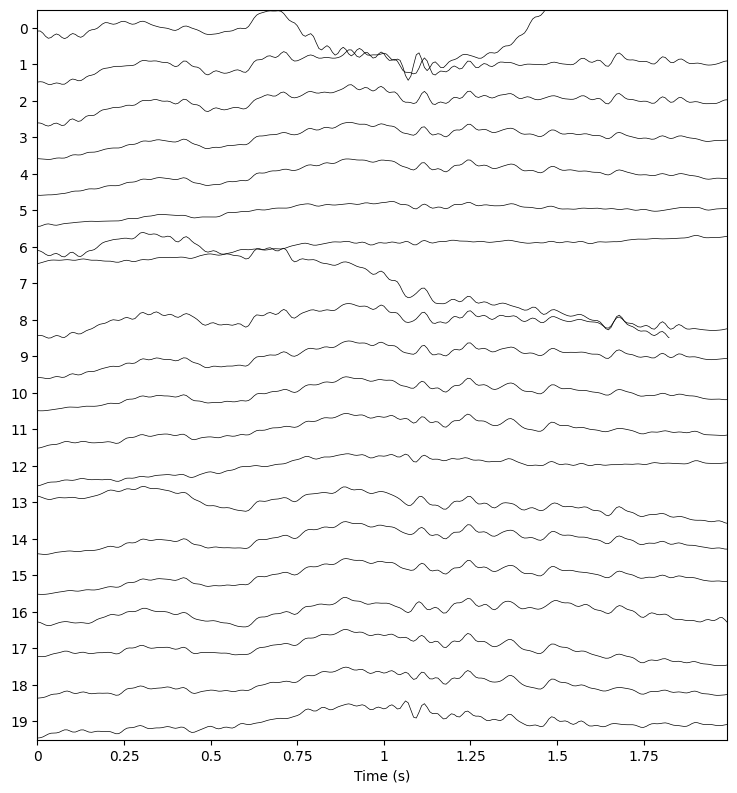

In [4]:
def get_subjects(basedir):
    files = np.array([i for i in os.listdir(basedir) if i.split('.')[-1] == 'set'])
    subjects = np.array([i.split('_')[0] for i in os.listdir(basedir) if i.split('.')[-1] == 'set'])
    return subjects, files

subjects, files = get_subjects("/mnt/nemar/child-mind-rest")
subj_train, subj_test, files_train, files_test = train_test_split(subjects, files, test_size=0.1, random_state=1)

subj_train, subj_val, files_train, files_val = train_test_split(subj_train, files_train, test_size=0.22, random_state=1) # 0.22 x 0.9 = 0.2
SFREQ = 128
dataset = MaskedContrastiveLearningDataset(
        data_dir = "/mnt/nemar/child-mind-rest",
        # subjects = subj_train.tolist(),
        n_subjects=10,
        x_params = {
            'window': 256
        },
    )
print('Length of dataset', len(dataset))
print('X dim', dataset[0].shape)
eeg_utils.plot_raw_eeg(dataset[0])

In [10]:
device = torch.device('cpu')
# model = LacunaModel()
model = Wav2VecBrainModel()
model.to(device=device)
model.train()
dataloader = DataLoader(dataset, batch_size = 10, shuffle = True)
for t, samples in enumerate(dataloader):
    samples = samples.to(device=device, dtype=torch.float32)
    print('input dim', samples.shape)
    embeddings = model.feature_encoder(samples)
    print('feature embeddings shape', embeddings.shape)
    context_embeddings = model.context_encoder(embeddings) 
    print('context embeddings shape', context_embeddings.shape)

feature embeddings shape torch.Size([10, 768, 52])
context embeddings shape torch.Size([10, 768, 52])
feature embeddings shape torch.Size([10, 768, 52])
context embeddings shape torch.Size([10, 768, 52])
feature embeddings shape torch.Size([10, 768, 52])
context embeddings shape torch.Size([10, 768, 52])
feature embeddings shape torch.Size([10, 768, 52])
context embeddings shape torch.Size([10, 768, 52])
feature embeddings shape torch.Size([10, 768, 52])
context embeddings shape torch.Size([10, 768, 52])
feature embeddings shape torch.Size([10, 768, 52])
context embeddings shape torch.Size([10, 768, 52])
feature embeddings shape torch.Size([10, 768, 52])
context embeddings shape torch.Size([10, 768, 52])
feature embeddings shape torch.Size([10, 768, 52])
context embeddings shape torch.Size([10, 768, 52])
feature embeddings shape torch.Size([10, 768, 52])
context embeddings shape torch.Size([10, 768, 52])
feature embeddings shape torch.Size([10, 768, 52])
context embeddings shape torch.

KeyboardInterrupt: 

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [01:00<00:00, 438316.32it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 191952.07it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:12<00:00, 357958.85it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13779372.68it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [1]:
import numpy as np
import torch

seed = 0
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

shuffling_indices = list(range(100))
np.random.shuffle(shuffling_indices)
print(shuffling_indices)

[26, 86, 2, 55, 75, 93, 16, 73, 54, 95, 53, 92, 78, 13, 7, 30, 22, 24, 33, 8, 43, 62, 3, 71, 45, 48, 6, 99, 82, 76, 60, 80, 90, 68, 51, 27, 18, 56, 63, 74, 1, 61, 42, 41, 4, 15, 17, 40, 38, 5, 91, 59, 0, 34, 28, 50, 11, 35, 23, 52, 10, 31, 66, 57, 79, 85, 32, 84, 14, 89, 19, 29, 49, 97, 98, 69, 20, 94, 72, 77, 25, 37, 81, 46, 39, 65, 58, 12, 88, 70, 87, 36, 21, 83, 9, 96, 67, 64, 47, 44]


In [2]:
np.random.shuffle(shuffling_indices)
print(shuffling_indices)

[33, 76, 79, 21, 49, 12, 93, 30, 78, 24, 31, 20, 95, 72, 25, 73, 68, 16, 56, 98, 77, 86, 15, 82, 10, 0, 48, 74, 64, 4, 22, 50, 46, 5, 3, 19, 40, 75, 81, 9, 34, 32, 6, 39, 80, 57, 54, 69, 47, 35, 29, 44, 58, 67, 89, 45, 60, 13, 1, 11, 14, 96, 37, 8, 63, 36, 28, 90, 59, 65, 92, 70, 87, 18, 85, 88, 61, 7, 99, 91, 43, 17, 84, 27, 66, 2, 52, 71, 23, 41, 53, 26, 97, 62, 94, 42, 55, 83, 38, 51]


In [3]:
np.random.shuffle(shuffling_indices)
print(shuffling_indices)

[6, 55, 1, 25, 87, 49, 69, 63, 13, 8, 93, 81, 72, 11, 28, 70, 73, 15, 98, 95, 58, 18, 43, 85, 37, 22, 51, 92, 56, 41, 17, 27, 14, 0, 60, 16, 76, 78, 68, 45, 47, 97, 33, 40, 34, 12, 94, 38, 35, 3, 26, 5, 86, 53, 30, 57, 91, 2, 59, 50, 36, 80, 29, 48, 88, 42, 99, 32, 24, 9, 62, 83, 4, 7, 77, 54, 44, 67, 82, 74, 79, 64, 75, 89, 31, 66, 20, 46, 39, 71, 65, 96, 52, 19, 61, 21, 84, 90, 10, 23]
